## classifying flowers using a decision tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

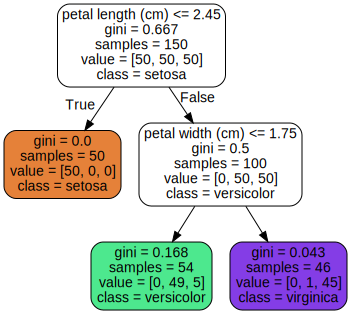

In [3]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [4]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

## using min_samples_leaf parameter to reduce over fitting

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X, y)
tree_clf2.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [7]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

In [8]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [9]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## using decision tree to perform a regression task

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg,
    out_file="tree_reg.dot",
    feature_names=["x1"],
    class_names=["y"],
    rounded=True,
    filled=True
)

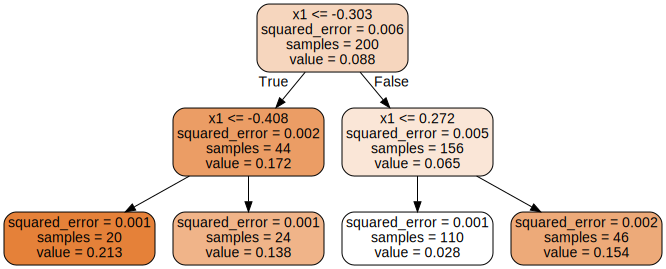

In [12]:
from graphviz import Source

Source.from_file("tree_reg.dot")

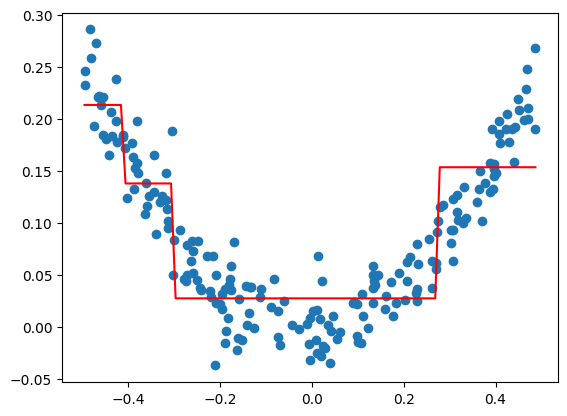

In [17]:
import matplotlib.pyplot as plt

X_range = np.linspace(min(X_quad), max(X_quad), 100).reshape(-1, 1)
y_pred = tree_reg.predict(X_range)

plt.scatter(X_quad, y_quad)
plt.plot(X_range, y_pred, color='red')
plt.show()

## using multiple models to improve performance

In [19]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [20]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.85
rf = 0.87
svc = 0.87


In [21]:
voting_clf.score(X_test, y_test)

0.87

In [22]:
voting_clf.voting = 'soft'
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.88